<a href="https://colab.research.google.com/github/nicholasfurl/Great-Courses/blob/main/Lesson10_backpropLogRegress_shipwreck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#In this notebook we will train a multi-layer perceptron and a logistic regression on our ship data

In [ ]:
#policy at the moment is keep these here for reference but don't run them. 
#Instead run them in cell near first object call that requires each

import csv
import random
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [1]:
#Comes from the Github from the GC lesson
#Data on suvivors of Titanic
!wget https://github.com/mlittmancs/great_courses_ml/raw/master/data/ship.csv

--2023-01-08 11:58:12--  https://github.com/mlittmancs/great_courses_ml/raw/master/data/ship.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/data/ship.csv [following]
--2023-01-08 11:58:12--  https://raw.githubusercontent.com/mlittmancs/great_courses_ml/master/data/ship.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘ship.csv’

ship.csv            100%[===================>]  59.76K  --.-KB/s    in 0.001s  

2023-01-08 11:58:12 (55.0 MB/s) - ‘ship.csv’ saved [61194/61194]



In [2]:
#Opens data for reading and creates new list data which lacks the col headers

import csv

#So now we have csv.reader(f, ...) instead of f.readlines()???
with open("ship.csv") as f:
    csvdata = csv.reader(f, delimiter=',')

    #Why does this need to be indented? The with somehow applies to this and not to the below??
    #So this does NOT create a list that enumerates the second through last rows of data as 1, 2, 3 ....
    #row is not an integer iterator row = 1, 2, 3 ... !!!
    #Row is the actual row of csv data so when you assign it, you literally assign the whole list item from csvdata
    #So this creates a new list data that contains 2nd to end rows of csv data
    #Seem inelegant - matlab you'd just use one simple line and assign new = old(2:end,:)
    first = True
    data = []
    for row in csvdata:
      if not first: data += [row]
      first = False

print(data)



[['1', '0', '3', 'Braund, Mr. Owen Harris', 'male', '22', '1', '0', 'A/5 21171', '7.25', '', 'S'], ['2', '1', '1', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', '38', '1', '0', 'PC 17599', '71.2833', 'C85', 'C'], ['3', '1', '3', 'Heikkinen, Miss. Laina', 'female', '26', '0', '0', 'STON/O2. 3101282', '7.925', '', 'S'], ['4', '1', '1', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', '35', '1', '0', '113803', '53.1', 'C123', 'S'], ['5', '0', '3', 'Allen, Mr. William Henry', 'male', '35', '0', '0', '373450', '8.05', '', 'S'], ['6', '0', '3', 'Moran, Mr. James', 'male', '', '0', '0', '330877', '8.4583', '', 'Q'], ['7', '0', '1', 'McCarthy, Mr. Timothy J', 'male', '54', '0', '0', '17463', '51.8625', 'E46', 'S'], ['8', '0', '3', 'Palsson, Master. Gosta Leonard', 'male', '2', '3', '1', '349909', '21.075', '', 'S'], ['9', '1', '3', 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 'female', '27', '0', '2', '347742', '11.1333', '', 'S'], ['10', '1', '2', 'Nasser, 

In [3]:
#OK, so array gives the possible values for each variables in the data as a list of dictionaries
#So the first col for example is passenger class P class and , when finished, 
#array[1] (the second index, or "survived") equals {'0': 0, '1': 1}, or passengers either survived or not
#It's like using unique ... 
#The second value (and the new variable to create it) is just the index (starting with the 0th) into the dictionary

#It helps to know the headers of the original data. The csvdata reader object created is not subscriptable 
#but if you read it in with f.readlines and then suscript the 0th col withg the header data you get
#PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked.
#and this (for example) is the last line of data:
#['891', '0', '3', 'Dooley, Mr. Patrick', 'male', '32', '0', '0', '370376', '7.75', '', 'Q']
#Makes much more sense when one knows this much ...

array = []

#This would appear to loop through the 12 "columns" (comma separated elements) of the 891 item long list data
for col in range(len(data[0])):

  #print(col)

  #curly braces are dictionary items (defined for each col)
  array += [{}] #So create a new list item to hold a dictionary of values for this col of data
  new = 0       #The index of each dictionary entry for this col

  #For the colth column, loop through all 891 rows using i
  #If a value is encountered that is not already in dictionary, add it and and assign it a newly incremented index new
  for i in range(len(data)):

    #Get the comma separated string	
     line = data[i]	

     #If the colth value of the ith line does not already have a dictionary entry in the colth col
     #assign to the colth item of array a dictionary entry for the colth element of line and give it an index new
     if line[col] not in array[col]:
      array[col][line[col]] = new
      new += 1  

      



In [ ]:
#skip and ignore ...

print(line)
print(array[2])

['891', '0', '3', 'Dooley, Mr. Patrick', 'male', '32', '0', '0', '370376', '7.75', '', 'Q']
{'3': 0, '1': 1, '2': 2}


In [ ]:
#skip and ignore ...

#del(array)

#array = []

#col=0

#array += [{}]
#new = 0

i=1
print(range(len(data[0])))

line = data[i]
print(line)

print(array[col])

if line[col] not in array[col]:
        array[col][line[col]] = new

print(line[col])
#print(array[col][line[col]])

print(array)


range(0, 12)
['2', '1', '1', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', '38', '1', '0', 'PC 17599', '71.2833', 'C85', 'C']
{'1': 0, '2': 0}
2
[{'1': 0, '2': 0}]


In [ ]:
#skip and ignore ...

print(csvdata)
print(array[11])

{'S': 0, 'C': 1, 'Q': 2, '': 3}


In [ ]:
#Skip this; just playing

#So of the the N items in a list N long itself has a length that is not reflected in the shape of the list, which is the number of comma-separated items, even when no splitting has been done!
#And you can iterate through them with a loop, without splitting first, apparently

len(data[0])
print(data[0])

['1', '0', '3', 'Braund, Mr. Owen Harris', 'male', '22', '1', '0', 'A/5 21171', '7.25', '', 'S']


In [ ]:

#Skip this; just testing things

#Checking whether f.readlines and csv.reader do the same things
#And they do!

#del(csvdata,data,f,first,row)

first = True

#So now we have csv.reader(f, ...) instead of f.readlines()???
with open("ship.csv") as f:
    csvdata = f.readlines()

    #Why does this need to be indented? The with somehow applies to this and not to the below??
    #So this does NOT create a list that enumerates the second through last rows of data as 1, 2, 3 ....
    #row is not an integer iterator row = 1, 2, 3 ... !!!
    #Row is the actual row of csv data so when you assign it, you literally assign the whole list item from csvdata
    #So this creates a new list data that contains 2nd to end rows of csv data
    #Seem inelegant - matlab you'd just use one simple line and assign new = old(2:end,:)
    data = []
    for row in csvdata:
      if not first: data += [row]
      first = False

print(csvdata[0])
print(data)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked

['1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\n', '2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\n', '3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\n', '4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\n', '5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\n', '6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\n', '7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\n', '8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\n', '9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\n', '10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\n', '11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\n', '12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C10

In [5]:
#OK so we have read in csvdata and assigned the data bit of it to data 
#and we have made array, which holds dictionaries of the possible values of each variable in data.
#What next to format?

#initialise lists to hold train/test data and their labels
alldat = []
alllabs = []

#Loop through items in dataset
for line in data:

  #We are predicting survival, no? 1 or 0. That's the second col (index 1), following paggenger id. 
  alllabs += [int(line[1])]

  #The 5th col in line appears to be age. Lesson is replacing missing data with 50 (the mean or what?)
  if line[5] == '': line[5] = '50'

  #Append to list a list containing the nine chosen features in a rather different order than in the dataset and splitting categorical variable port of call into three binanry variables for each port (prob good for logistic regression anyway)
  alldat += [ [int(line[2]), array[4][line[4]], float(line[5]), int(line[6]), int(line[7]), float(line[9]), line[11]=='S', line[11]=='C', line[11]=='Q' ]]

#Manuually create list of variable names
feats = ['Pclass','Sex','Age','SibSp','Parch','Fare', 'Embarked S', 'Embarked C', 'Embarked Q']

In [7]:
#split into training and test data

import random

#another mask:
#find random integer between 0 and 2 inclusive for every (ith) item in alldat (so a 0, 1 or 2)
trainmask = [random.randint(0,2) for i in range(len(alldat))]

#Assign two thirds of data to training data and labels and the rest for test
#traindat will be copied over from alldat if its items have random numbers less than 2
traindat = [alldat[i] for i in range(len(alldat)) if trainmask[i]<2]
trainlabs = [alllabs[i] for i in range(len(alldat)) if trainmask[i]<2]
#To be copied to test, random numbers correspoinding to items in alldat must be exactly 2
testdat = [alldat[i] for i in range(len(alldat)) if trainmask[i]==2]
testlabs = [alllabs[i] for i in range(len(alldat)) if trainmask[i]==2]




[0.1610738255033557]
[0.8389261744966443]
[[168  10]
 [ 38  82]]


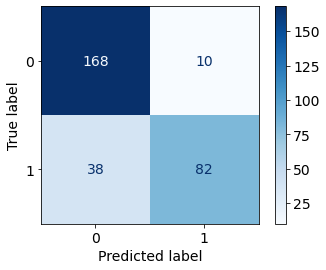

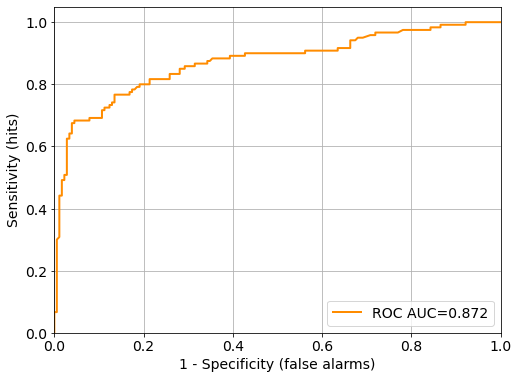

In [41]:
#Time for neural network. I think relu is default?
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

from sklearn.neural_network import MLPClassifier

nhidden = 60
clf = MLPClassifier(hidden_layer_sizes=[nhidden], max_iter = 50000)
clf = clf.fit(traindat, trainlabs)
pred = clf.predict(testdat)

#error rate (test data)
nn_err = [sum([pred[i] != testlabs[i] for i in range(len(testlabs))]) / len(testlabs)]
print(nn_err)

#proportion correct (test data)
nn_correct = [sum([pred[i] == testlabs[i] for i in range(len(testlabs))]) / len(testlabs)]
print(nn_correct)

#proportion correct, better way
#print(clf.score(testdat,testlabs))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(testlabs, pred))

#Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        testdat,
        testlabs,
        cmap=plt.cm.Blues,
    )


#I need to supply the measure of confidence
#from sklearn.metrics import roc_curve
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier.score

#Looks like there is one column for each class and one is just 1 - p of the other one p. So we can just take one col and run with it (like example)
prediction_proba = clf.predict_proba(testdat)[:, 1]
#print(clf.predict_proba(testdat))

from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np

#tmp = np.array(testlabs)

#Check out this ravel later. Seems a bit like flatten. Is always needed?
#fpr, tpr, _ = roc_curve(np.ravel(np.array(testlabs)), np.ravel(prediction_proba))
fpr, tpr, _ = roc_curve(testlabs, prediction_proba) #The simple way worked all along!
roc_auc = roc_auc_score(testlabs, prediction_proba)

import matplotlib

plt.figure(figsize=(8, 6))
matplotlib.rcParams.update({'font.size': 14})
plt.grid()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC AUC={0:.3f}'.format(roc_auc))
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (false alarms)')
plt.ylabel('Sensitivity (hits)')
plt.show()


In [50]:
#Next we will calculate how much higher the predictions are for females vs. males

# feats = ['Pclass','Sex','Age','SibSp','Parch','Fare', 'Embarked S', 'Embarked C', 'Embarked Q']

#The result: The model is about 47% more likely to predict survival if it thinks the observation is female versus male

#Note the lesson code says ~38% but I'm using the exact same code

imp = []

#all the data rows / cases
#remember, v isn't an iterator, it's the actual row itself
for v in alldat:

  #second element in row? Gender
  #keep real value to restore later
  #NOTE: surely using alldat mixed training and test data all together
  real = v[1]

  #Get classification probability for second column for this observation in data
  #with gender set to 0
  v[1] = 0
  asmale = clf.predict_proba([v])[0][1]

  #Get classification probability for second column for this observation in data
  #with gender set to 1
  v[1] = 1
  asfemale = clf.predict_proba([v])[0][1]

  #restore real gender value
  v[1] = real

  #ppend to list the greater probability of survival prediction when model believes
  #observations are female compared to when it believes abservations are male
  imp += [ asfemale-asmale ]

#output the sum of the probability of survisial predictions for female, out of the total number of observations 
#i.e., the mean!
print(sum(imp)/len(imp))


0.46511888150555014


In [48]:
#skip this.

print(v)
print(v[1])
print(clf.predict_proba([v])[0][1])

[3, 0, 32.0, 0, 0, 7.75, False, False, True]
0
0.11326318653800897


0.806070826306914 0.8053691275167785


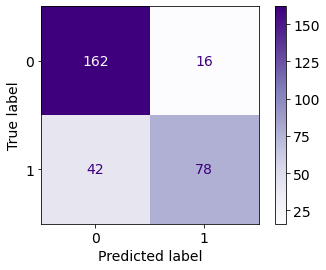

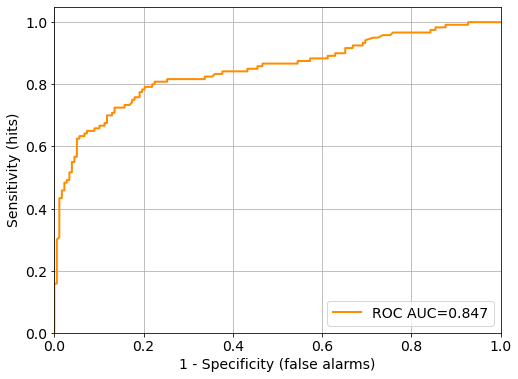

In [54]:
#Next we will train a logistic regression and print the accuracy of the model on the train and test datasets

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter = 500)
clf.fit(traindat, trainlabs)  

#Training data results (I've switched *err to be proportion correct)
pred = clf.predict(traindat)
trainerr = sum([pred[i] == trainlabs[i] for i in range(len(trainlabs))]) / len(trainlabs)

#test data results (I've switched *err to be proportion correct)
pred = clf.predict(testdat)
testerr = sum([pred[i] == testlabs[i] for i in range(len(testlabs))]) / len(testlabs)

print(trainerr, testerr)

#test data confusions, ROC and AUC

#Plot confusion matrix
#colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay.from_estimator(
        clf,
        testdat,
        testlabs,
        cmap=plt.cm.Purples,
    )

prediction_proba = clf.predict_proba(testdat)[:, 1]

from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np

fpr, tpr, _ = roc_curve(testlabs, prediction_proba) #The simple way worked all along!
roc_auc = roc_auc_score(testlabs, prediction_proba)

import matplotlib

plt.figure(figsize=(8, 6))
matplotlib.rcParams.update({'font.size': 14})
plt.grid()
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='ROC AUC={0:.3f}'.format(roc_auc))
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (false alarms)')
plt.ylabel('Sensitivity (hits)')
plt.show()




In [55]:
#Finally we'll plot the coefficients of the logistic regression model

#This result seems to slgihtly differ from lesson's too

#Random starting points for gradient descent? Or stochastic gradient descent?

#Same story though: Sex positively and Pclass negatively predicts survival

#For each feature, print that feature name and output weight (coefficient) with coef
for i in range(len(feats)):
  print(feats[i], clf.coef_[0][i])

Pclass -1.1100671412387102
Sex 2.538061178954744
Age -0.030572055052743644
SibSp -0.2256643387172094
Parch -0.09746319907925832
Fare 0.0010860732999406176
Embarked S -0.40719926938873463
Embarked C 0.15589956576905198
Embarked Q 0.19275476004507597
